<a href="https://colab.research.google.com/github/snehasrini99/Network_attack_classification/blob/main/ML_modeling_KDD_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Modeling_KDD + Augmented data
running different ML algorithms with KDD dataset combined with additional augmented dataset to sort which ML algorithm works best with Network dataset and saves only the attack labels for further usage

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay #changed From sklearn 1.2
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix

# Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
%cd drive/MyDrive/24Spring/NSP/Project

[Errno 2] No such file or directory: 'drive/MyDrive/24Spring/NSP/Project'
/content/drive/MyDrive/24Spring/NSP/Project


## Cleaned KDD_a Data

In [59]:
Trained_Data_KDD_a = pd.read_csv("/content/drive/MyDrive/24Spring/NSP/Project/Data_final/Cleaned_Trained_Data.csv" , sep = "," , encoding = 'utf-8')
Tested_Data_KDD_a = pd.read_csv("/content/drive/MyDrive/24Spring/NSP/Project/Data_final/Cleaned_Tested_Data.csv" , sep = "," , encoding = 'utf-8')

In [89]:
# Trained_Data_KDD_a.info()

In [91]:
# Tested_Data_KDD_a.info()

### Data Encoding

In [62]:
#new columns can be added (one for each unique category)
Trained_Data_KDD_a = pd.get_dummies(Trained_Data_KDD_a,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")
Tested_Data_KDD_a = pd.get_dummies(Tested_Data_KDD_a,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [63]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data_KDD_a['attack'] = attack_LE.fit_transform(Trained_Data_KDD_a["attack"])
Tested_Data_KDD_a['attack'] = attack_LE.fit_transform(Tested_Data_KDD_a["attack"])

### Data Splitting

In [64]:
X_train_KDD_a = Trained_Data_KDD_a.drop(['attack', 'level', 'attack_state'], axis=1)
X_test_KDD_a = Tested_Data_KDD_a.drop(['attack', 'level', 'attack_state'], axis=1)


Y_train_KDD_a = Trained_Data_KDD_a['attack_state']
Y_test_KDD_a = Tested_Data_KDD_a['attack_state']

X_train_train_KDD_a,X_test_train_KDD_a ,Y_train_train_KDD_a,Y_test_train_KDD_a = train_test_split(X_train_KDD_a, Y_train_KDD_a, test_size= 0.25 , random_state=42)

# Variable names
# X_train = X_train_train_KDD_a
# Y_train = Y_train_train_KDD_a

# X_test = X_test_train_KDD_a
# Y_test = Y_test_train_KDD_a

### Data Scaling

In [65]:
Ro_scaler = RobustScaler()
X_train_train_KDD_a = Ro_scaler.fit_transform(X_train_train_KDD_a)
X_test_train_KDD_a = Ro_scaler.transform(X_test_train_KDD_a)
# X_train_test_KDD_a = Ro_scaler.fit_transform(X_train_test_KDD_a)
# X_test_test_KDD_a = Ro_scaler.transform(X_test_test_KDD_a)

In [66]:
X_train_train_KDD_a.shape, Y_train_train_KDD_a.shape
X_test_train_KDD_a.shape, Y_test_train_KDD_a.shape
# X_train_test_KDD_a.shape, Y_train_test_KDD_a.shape
# X_test_test_KDD_a.shape, Y_test_test_KDD_a.shape

((31493, 122), (31493,))

### VIF

In [67]:
A = sm.add_constant(X_train_KDD_a.astype(float))
Est1 = sm.GLM(Y_train_KDD_a, A)
Est2 = Est1.fit()
Est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           attack_state   No. Observations:               125972
Model:                            GLM   Df Residuals:                   125854
Model Family:                Gaussian   Df Model:                          117
Link Function:               Identity   Scale:                        0.030165
Method:                          IRLS   Log-Likelihood:                 41832.
Date:                Tue, 07 May 2024   Deviance:                       3796.3
Time:                        15:17:38   Pearson chi2:                 3.80e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9993
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.3035      0.008     40.015      0.000       0.289       0.318
duration                    -4.074e-06   2.35e-07    -17.350      0.000   -4.53e-06   -3.61e-06
src_bytes                    4.584e-10   8.53e-11      5.373      0.000    2.91e-10    6.26e-10
dst_bytes                     1.67e-10   1.22e-10      1.372      0.170   -7.17e-11    4.06e-10
land                           -0.2506      0.035     -7.079      0.000      -0.320      -0.181
wrong_fragment                  0.1968      0.002     86.967      0.000       0.192       0.201
urgent                         -0.0057      0.035     -0.165      0.869      -0.073       0.062
hot                             0.0251      0.000     55.886      0.000       0.024       0.026
num_failed_logins               0.0499      0.011      4.470      0.000       0.028       0.072
logged_in                       0.1670      0.004     42.903      0.000       0.159       0.175
num_compromised                 0.0086      0.001     13.969      0.000       0.007       0.010
root_shell                      0.1463      0.017      8.532      0.000       0.113       0.180
su_attempted                   -0.0668      0.018     -3.779      0.000      -0.101      -0.032
num_root                       -0.0086      0.001    -13.991      0.000      -0.010      -0.007
num_file_creations             -0.0121      0.001    -11.550      0.000      -0.014      -0.010
num_shells                     -0.0192      0.022     -0.858      0.391      -0.063       0.025
num_access_files                0.0338      0.007      4.991      0.000       0.021       0.047
num_outbound_cmds            6.425e-16   6.05e-16      1.062      0.288   -5.44e-16    1.83e-15
is_host_login                  -0.3679      0.174     -2.117      0.034      -0.708      -0.027
is_guest_login                 -0.4361      0.013    -34.383      0.000      -0.461      -0.411
count                           0.0002   1.03e-05     15.557      0.000       0.000       0.000
srv_count                       0.0004   1.53e-05     24.095      0.000       0.000       0.000
serror_rate                    -0.0656      0.012     -5.335      0.000      -0.090      -0.042
srv_serror_rate                 0.2685      0.013     20.041      0.000       0.242       0.295
rerror_rate                    -0.0820      0.013     -6.233      0.000      -0.108      -0.056
srv_rerror_rate                 0.6245      0.015     40.926      0.000       0.595       0.654
same_srv_rate                  -0.3404      0.004    -78.481      0.000      -0.349      -0.332
diff_srv_rate                  -0.0645      0.004    -15.392      0.000      -0.073      -0.056
srv_diff_host_rate              0.0376      0.002     15.366      0.000       0.033       0.042
dst_host_co

### Data Modeling

In [68]:
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):

    Pred_Value= Model_Abb.predict(X_test)
    Accuracy = metrics.accuracy_score(Y_test,Pred_Value)
    Sensitivity = metrics.recall_score(Y_test,Pred_Value)
    Precision = metrics.precision_score(Y_test,Pred_Value)
    F1_score = metrics.f1_score(Y_test,Pred_Value)
    Recall = metrics.recall_score(Y_test,Pred_Value)

    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy,6)))
    print('The {} Model Sensitvity = {}\n'.format(Model_Name, np.round(Sensitivity,6)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision,6)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score,6)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall,6)))
    print('--------------------------------------------------\n')

    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix,class_names=['Normal', 'Attack'],figsize=(5.55,5), colorbar= "blue")

    # changed into RocCurveDisplay https://github.com/mrdbourke/zero-to-mastery-ml/issues/45
    # RocCurveDisplay.from_estimator(estimator=gs_log_reg, X=X_test, y=y_test);
    RocCurveDisplay.from_estimator(estimator=Model_Abb, X=X_test, y=Y_test)

    return X_test, Y_test, Pred_Value

In [69]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_

    return (Model_Name)

In [70]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=42)
X_train_train_KDD_a, Y_train_train_KDD_a = oversample.fit_resample(X_train_train_KDD_a,Y_train_train_KDD_a)

#### Logistic Regression

In [71]:
LR_KDD_a = LogisticRegression()
LR_KDD_a.fit(X_train_train_KDD_a , Y_train_train_KDD_a)

LogisticRegression()

--------------------------------------------------

The Logistic Regression Model Accuracy   = 0.868701

The Logistic Regression Model Sensitvity = 0.930075

The Logistic Regression Model Precision  = 0.815818

The Logistic Regression Model F1 Score   = 0.869208

The Logistic Regression Model Recall     = 0.930075

--------------------------------------------------



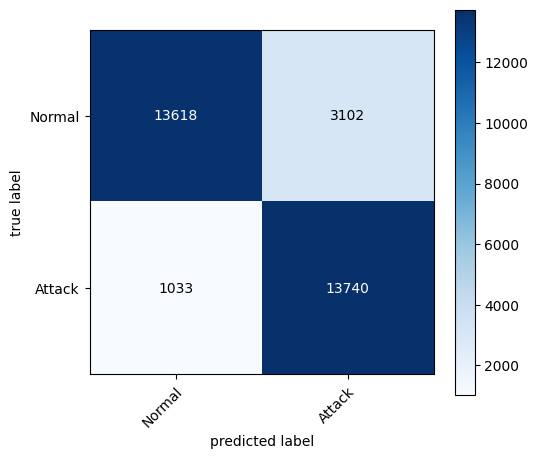

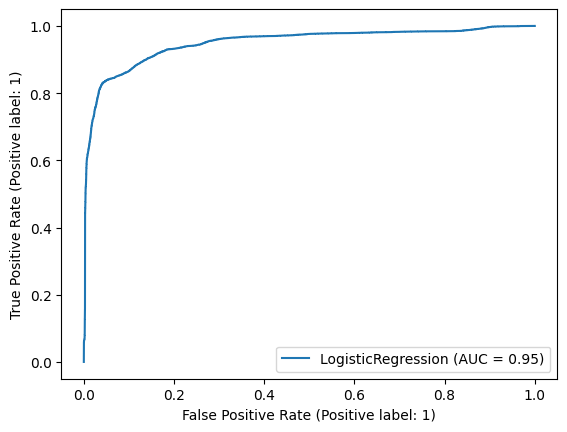

In [72]:
X_test_KDD_a_LR, Y_test_KDD_a_LR, Pred_Value_KDD_a_LR = Evaluate('Logistic Regression', LR_KDD_a, X_test_train_KDD_a, Y_test_train_KDD_a)

#### Decision Tree

In [73]:
DT_KDD_a = DecisionTreeClassifier(max_features=6, max_depth=4)
DT_KDD_a.fit(X_train_train_KDD_a, Y_train_train_KDD_a)

DecisionTreeClassifier(max_depth=4, max_features=6)

--------------------------------------------------

The Decision Tree Classifier Model Accuracy   = 0.903566

The Decision Tree Classifier Model Sensitvity = 0.97976

The Decision Tree Classifier Model Precision  = 0.840925

The Decision Tree Classifier Model F1 Score   = 0.905049

The Decision Tree Classifier Model Recall     = 0.97976

--------------------------------------------------



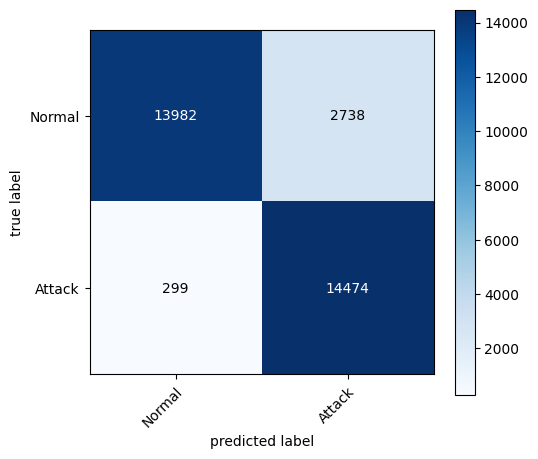

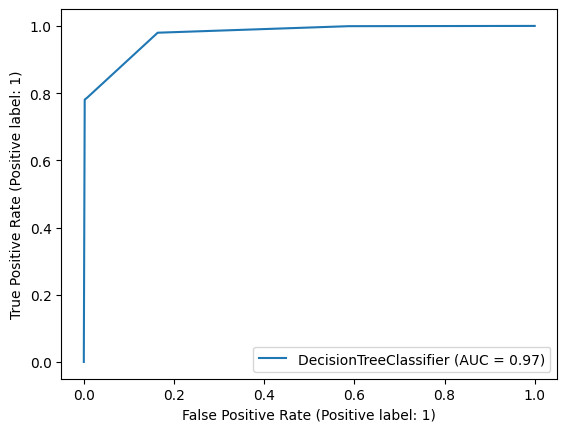

In [74]:
X_test_KDD_a_DT, Y_test_KDD_a_DT, Pred_Value_KDD_a_DT =Evaluate('Decision Tree Classifier', DT_KDD_a, X_test_train_KDD_a, Y_test_train_KDD_a)

#### Random Forest

In [75]:
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Parameters={ 'max_depth': max_depth}

In [76]:
RF_KDD_a = RandomForestClassifier()
GridSearch(RF_KDD_a, Parameters, X_train_train_KDD_a, Y_train_train_KDD_a)
RF_KDD_a.fit(X_train_train_KDD_a, Y_train_train_KDD_a)

RandomForestClassifier()

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 0.99892

The Random Forest Classifier Model Sensitvity = 0.998172

The Random Forest Classifier Model Precision  = 0.999526

The Random Forest Classifier Model F1 Score   = 0.998848

The Random Forest Classifier Model Recall     = 0.998172

--------------------------------------------------



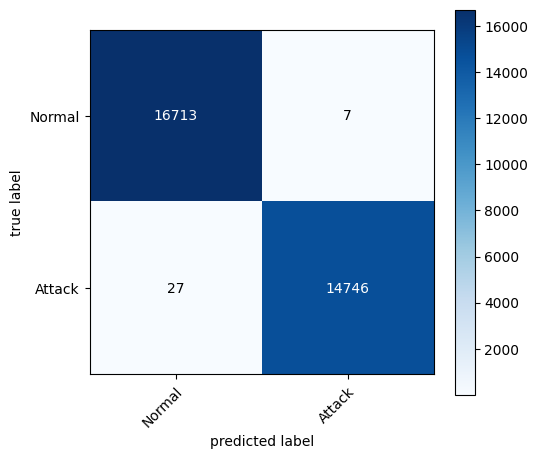

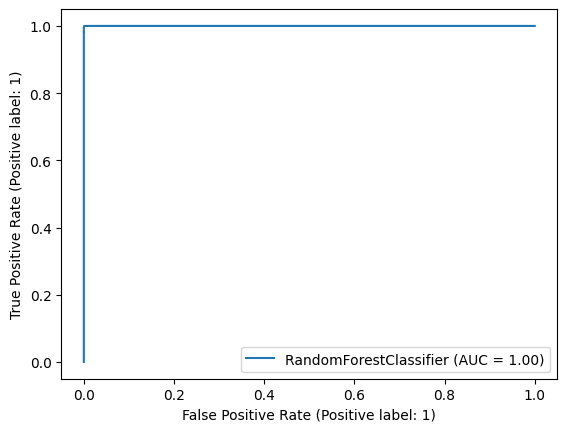

In [77]:
X_test_KDD_a_RF, Y_test_KDD_a_RF, Pred_Value_KDD_a_RF = Evaluate('Random Forest Classifier', RF_KDD_a, X_test_train_KDD_a, Y_test_train_KDD_a)

#### KNN

In [78]:
KNN_KDD_a = KNeighborsClassifier(n_neighbors=6)
KNN_KDD_a.fit(X_train_train_KDD_a, Y_train_train_KDD_a)

KNeighborsClassifier(n_neighbors=6)

--------------------------------------------------

The KNN Model Accuracy   = 0.992316

The KNN Model Sensitvity = 0.990456

The KNN Model Precision  = 0.993145

The KNN Model F1 Score   = 0.991798

The KNN Model Recall     = 0.990456

--------------------------------------------------



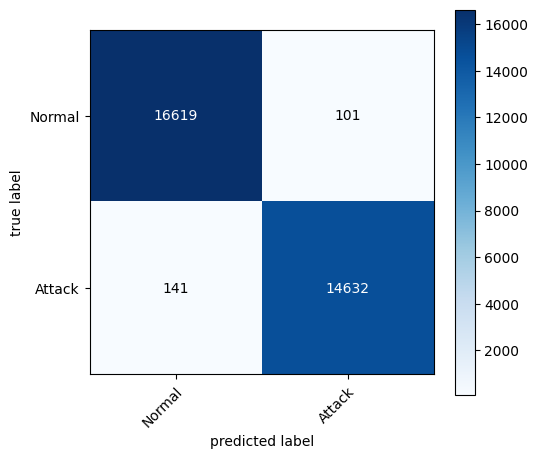

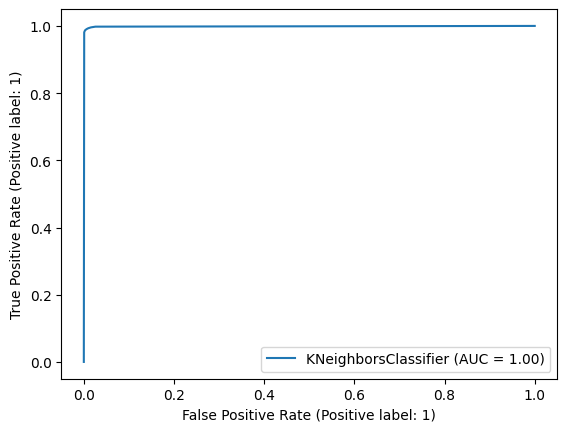

In [79]:
X_test_KDD_a_KNN, Y_test_KDD_a_KNN, Pred_Value_KDD_a_KNN =Evaluate('KNN', KNN_KDD_a, X_test_train_KDD_a, Y_test_train_KDD_a)

#### SVM

In [80]:
Linear_SVC_KDD_a = svm.LinearSVC(C=1)
Linear_SVC_KDD_a.fit(X_train_train_KDD_a, Y_train_train_KDD_a)

LinearSVC(C=1)

--------------------------------------------------

The SVM Linear SVC Kernel Model Accuracy   = 0.967929

The SVM Linear SVC Kernel Model Sensitvity = 0.969133

The SVM Linear SVC Kernel Model Precision  = 0.962746

The SVM Linear SVC Kernel Model F1 Score   = 0.965929

The SVM Linear SVC Kernel Model Recall     = 0.969133

--------------------------------------------------



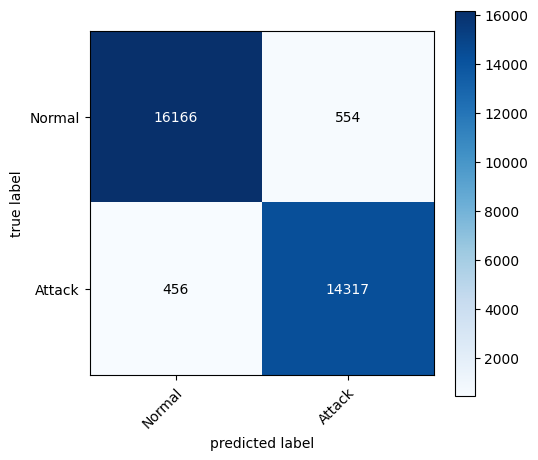

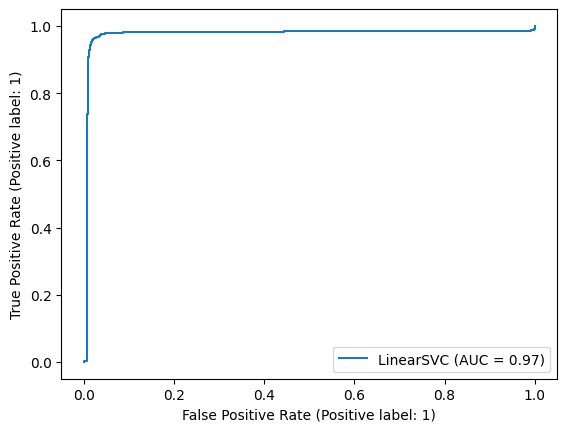

In [81]:
X_test_KDD_a_SVM, Y_test_KDD_a_SVM, Pred_Value_KDD_a_SVM =Evaluate('SVM Linear SVC Kernel', Linear_SVC_KDD_a, X_test_train_KDD_a, Y_test_train_KDD_a)

# Saving results to CSV
for further features on classifying which type of attack it was, we are saving the results from the Best Performed model using KDD dataset

In [82]:
def result(X_test, Y_test, Pred_Value):
# (122column, id as index, attack_state)

    # df_X_test = pd.DataFrame(X_test)
    df_Pred_Value_m = pd.Series(Pred_Value).rename('pred')
    m_Y_test = Y_test.reset_index()
    m_Y_test.columns = ['id', 'attack_state']

    # result = pd.concat([df_X_test, m_Y_test, df_Pred_Value_m], axis=1)
    result = pd.concat([m_Y_test, df_Pred_Value_m], axis=1)
    result = result.set_index('id')

    # count correct rows
    matching_df = (result['attack_state'] == result['pred']).sum()
    print(f"number of correct perdiction is: {matching_df}")
    print(f"total number of rows are: {len(X_test)}")

    # filter attacks
    filtered_df = result[result['attack_state'] == 1]
    print(f"number of rows that are attack is: {len(filtered_df)}")
    filtered_df

    return result, filtered_df

In [83]:
# Logistic Regression
result_KDD_a_lr, filtered_KDD_a_lr = result(X_test_KDD_a_LR, Y_test_KDD_a_LR, Pred_Value_KDD_a_LR)
result_KDD_a_lr.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_result_kdd_a_lr.csv',index = True)
filtered_KDD_a_lr.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_attacks_kdd_a_lr.csv',index = True)

number of correct perdiction is: 27358
total number of rows are: 31493
number of rows that are attack is: 14773


In [84]:
# Decision Tree
result_KDD_a_dt, filtered_KDD_a_dt = result(X_test_KDD_a_DT, Y_test_KDD_a_DT, Pred_Value_KDD_a_DT)
result_KDD_a_dt.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_result_kdd_a_dt.csv',index = True)
filtered_KDD_a_dt.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_attacks_kdd_a_dt.csv',index = True)

number of correct perdiction is: 28456
total number of rows are: 31493
number of rows that are attack is: 14773


In [85]:
# Random Forest
result_KDD_a_rf, filtered_KDD_a_rf = result(X_test_KDD_a_RF, Y_test_KDD_a_RF, Pred_Value_KDD_a_RF)
result_KDD_a_rf.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_result_kdd_a_rf.csv',index = True)
filtered_KDD_a_rf.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_attacks_kdd_a_rf.csv',index = True)

number of correct perdiction is: 31459
total number of rows are: 31493
number of rows that are attack is: 14773


In [86]:
# KNN
result_KDD_a_knn, filtered_KDD_a_knn = result(X_test_KDD_a_KNN, Y_test_KDD_a_KNN, Pred_Value_KDD_a_KNN)
result_KDD_a_knn.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_result_kdd_a_knn.csv',index = True)
filtered_KDD_a_knn.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_attacks_kdd_a_knn.csv',index = True)

number of correct perdiction is: 31251
total number of rows are: 31493
number of rows that are attack is: 14773


In [87]:
# # SVM
# result_KDD_a_svm, filtered_KDD_a_svm = result(X_test_KDD_a_SVM, Y_test_KDD_a_SVM, Pred_Value_KDD_a_SVM)
# result_KDD_a_svm.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_result_kdd_a_svm.csv',index = False)
# filtered_KDD_a_svm.to_csv(r'/content/drive/MyDrive/24Spring/NSP/Project/outcome/modeling_attacks_kdd_a_svm.csv',index = False)

# Further Analysis
Analysis on random forest using importance feature

                    Feature  Importance
1                 src_bytes    0.156604
29       dst_host_srv_count    0.070582
2                 dst_bytes    0.064380
19                    count    0.056461
120                      sf    0.056408
21              serror_rate    0.046093
25            same_srv_rate    0.045688
8                 logged_in    0.041966
30   dst_host_same_srv_rate    0.040972
31   dst_host_diff_srv_rate    0.039942


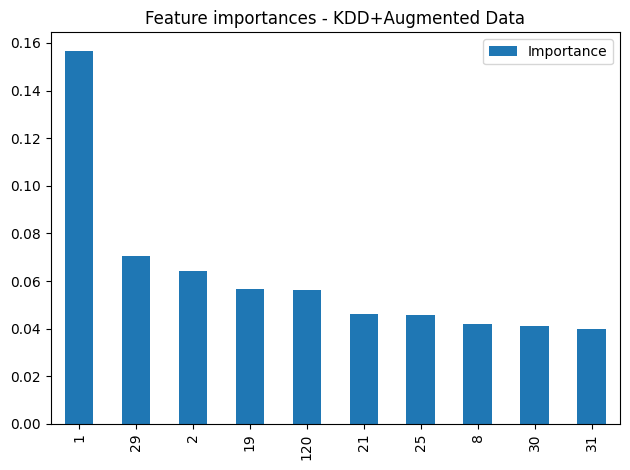

In [94]:
feature_names = X_train_KDD_a.columns.tolist()

importances_rf = RF_KDD_a.feature_importances_
feature_importance_rf = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
print(feature_importance_rf.head(10))

top_10_feature = feature_importance_rf.head(10)

fig, ax = plt.subplots()
top_10_feature.plot.bar(ax=ax)
ax.set_title("Feature importances - KDD+Augmented Data")
fig.tight_layout()